<h1><center>COMP1008: Exercise 2<br/>Data Visualisation and Processing</center></h1>

Data processing is a key step in machine learning. By analysing and visualising the data, an appropriate machine learning model can be chosen for our tasks, creating a model with higher accuracy. Errors in the data can also become evident for us to clean and process the data.

This exercise provides some examples and hands-on tasks on using `pandas` for data manipulation and `matplotlib` for data visualisation.

<div class="alert alert-success">
    <h3>Mini-Challenge 1: Graphing Combinatorial Explosion</h3>
</div>

After completing the guided tutorial on data visualisation and pre-processing, you are challenged to visualise the data in `data-combinatorial.xlsx` to show combinatorial explosion using your choice of suitable graph/chart and data processing techniques.

## 1. Visualisation using `pandas` 🐼 <span id="part1"></span>
In addition to data manipulation, the `pandas` package also provides a lot of plotting functionality.

In [1]:
# import the pandas package
import pandas as pd

# read a csv file from a url
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/Emissions%20Data.csv')

df.head()

,Year,Country,Continent,Emission
0,2008,Aruba,South America,24.750133
1,2009,Aruba,South America,24.876706
2,2010,Aruba,South America,24.182702
3,2011,Aruba,South America,23.922412
4,2008,Andorra,Europe,6.296125


### Plot

<Axes: >

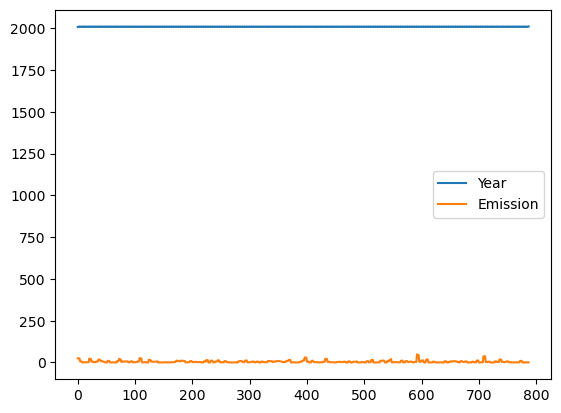

In [2]:
# 'plot' method: plots numerical data samples along their index in the DataFrame, i.e. 'Emission' and 'Year' in two series
df.plot()

This plot is not particularly useful. We need to understand the data with an appropriate visualisation, e.g. see any trend of $CO_2$ emissions over the years.

### Scatter Plot

<Axes: xlabel='Year', ylabel='Emission'>

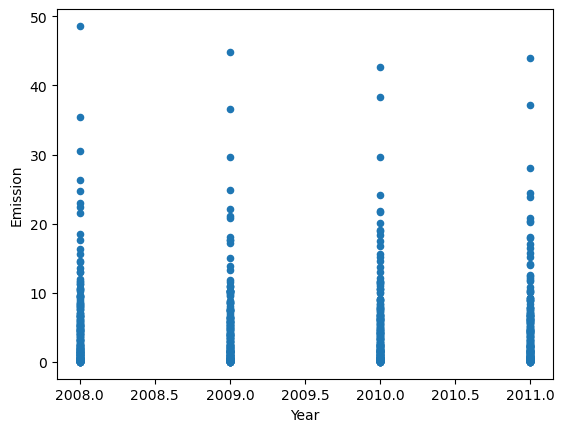

In [3]:
# 'scatter' method: plots numerical data samples of x-axis vs. y-axis.
df.plot.scatter(x="Year", y="Emission")

This visualisation using scatter plot is also not informative. Recall from "Exercise 1" how you can group data and do statistics.

<Axes: xlabel='Year'>

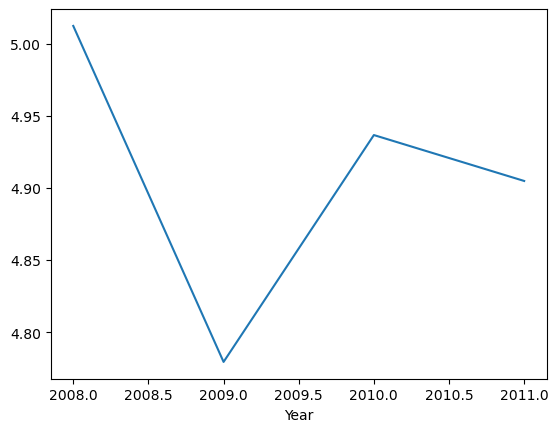

In [4]:
# Plot the average emissions of each year group. This plot is more informative.
df_avg = df.groupby("Year")["Emission"].mean()
df_avg.plot()

<div class="alert alert-info">
    <h3>Task 1</h3>
</div>

Plot the total emissions grouped by continent. Which continent contributed the most to emissions between 2008 and 2011 (the range of the dataset)?

'Asia'

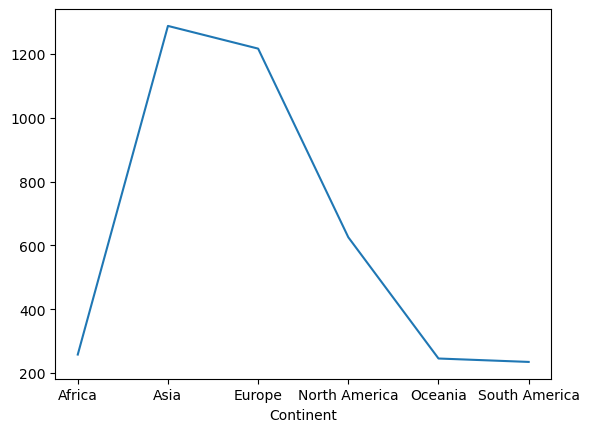

In [11]:
## your code here

df_total = df.groupby("Continent")["Emission"].sum()
df_total.plot()

df_2008_2011 = df_total.sort_values(ascending=False).index[0]
df_2008_2011

### Bar

A line plot is usually used to visualise continuous data. Continent is categorical, so a bar chart is more appropriate.

<Axes: xlabel='Continent'>

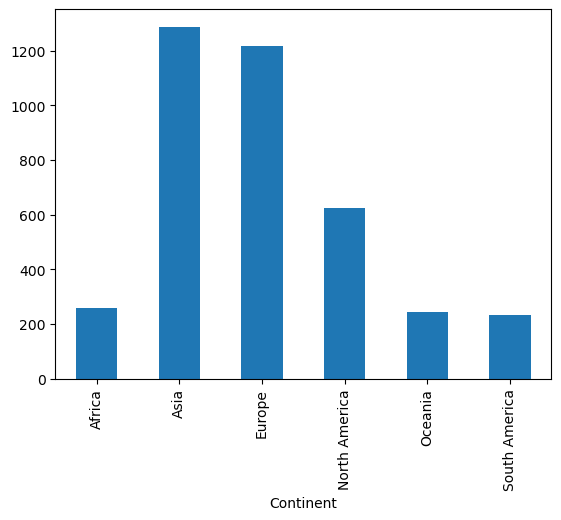

In [12]:
# specify the 'kind' of the plot
df_total.plot(kind='bar')

### Histogram

<a href="https://en.wikipedia.org/wiki/Histogram">Histograms</a> shows the distribution of our data. Each bar shows the frequency of a value in a "bin" (i.e. range of values on the x-axis). See <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html">pandas histogram</a> for more information.

<Axes: >

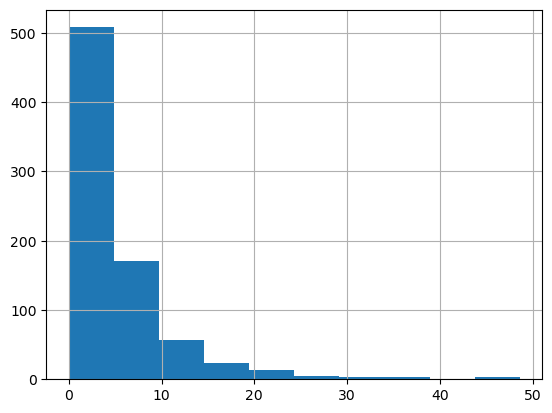

In [13]:
df['Emission'].hist()

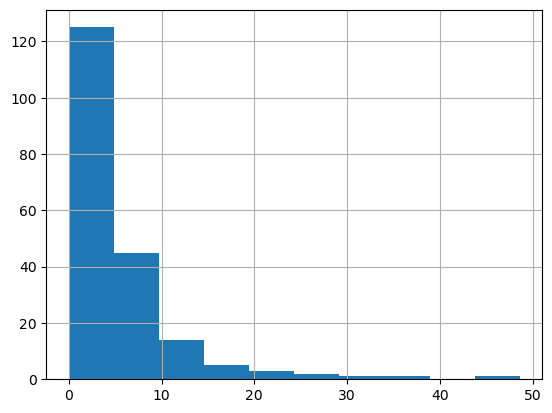

In [16]:
# create a DataFrame df_Europe by using a condition in the index
df2008 = df[df['Year']==2008]
df2008['Emission'].hist()

df_Europe = df[df["Continent"] == "Europe"]

### Visualise more information with combined plots

To combine plots on the same set of axes in scatter plots, we create and save the first plot by the returned axis reference `ax`. Then reuse the axis for the other plots by including `ax=ax` in the arguments of `scatter(...)`. 

In [22]:
df2008

,Year,Country,Continent,Emission
0,2008,Aruba,South America,24.750133
4,2008,Andorra,Europe,6.296125
8,2008,Afghanistan,Asia,0.158962
12,2008,Angola,Africa,1.369425
16,2008,Albania,Europe,1.580113
...,...,...,...,...
768,2008,Yemen,Asia,0.989905
772,2008,South Africa,Africa,9.506481
776,2008,Dem Rep Of Congo,Africa,0.048411
780,2008,Zambia,Africa,0.164692


<Axes: xlabel='Emission', ylabel='Continent'>

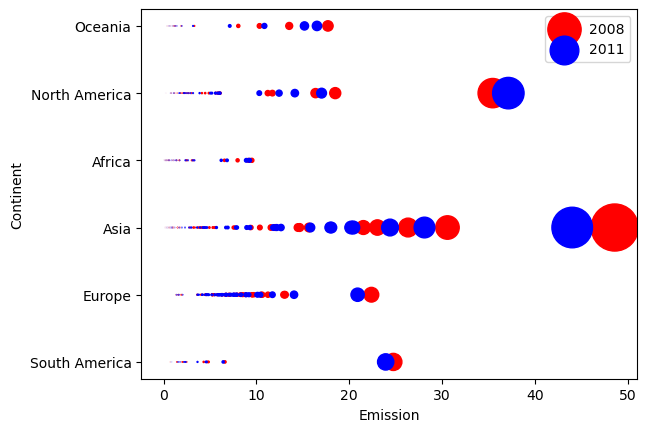

In [17]:
# comparing the emissions in 2008 and 2011 in the same scatter plot, s defines size of each point
ax = df2008.plot.scatter(x='Emission', y='Continent', color='red', s=df2008['Emission']**3/100, label='2008')
df2011 = df[df['Year']==2011]
df2011.plot.scatter(x='Emission', y='Continent', color='blue', s=df2011['Emission']**3/100, label='2011', ax=ax)

## 2. Visualisation using `matplotlib`

The pandas package builds upon matplotlib to make visualisation easier. We can usually use pandas plots, and when not available, access the more advanced additional features in the `matplotlib` library directly.

In [23]:
import matplotlib.pyplot as plt
import numpy as np

Let's now use the functions of `matplotlib` to create the same scatter plot as before but fix the issues with labels and axis spacing.

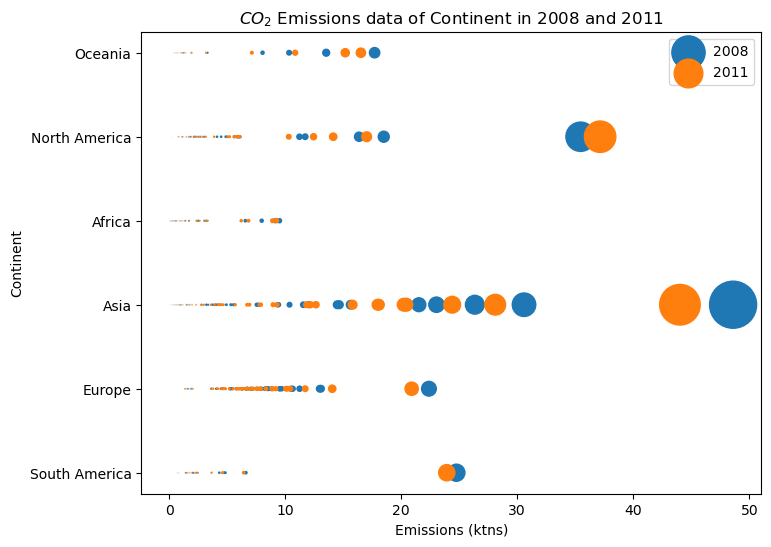

In [19]:
# create the scatter plot using matplotlib 'plt' directly, not by df.scatter.plot() in Pandas
plt.scatter(df2008['Emission'], df2008['Continent'], s=df2008['Emission']**3/100)
plt.scatter(df2011['Emission'], df2011['Continent'], s=df2011['Emission']**3/100)
plt.title('$CO_2$ Emissions data of Continent in 2008 and 2011')

# functionality available through matplotlib plt, not Pandas
# plt.xlim([0,80])
plt.xlabel('Emissions (ktns)')
plt.ylabel('Continent')
plt.legend(['2008','2011'])
# explicitly setting the size of the plot
plt.gcf().set_size_inches(8, 6)

In [25]:
plt.xticks?

Text(0.5, 1.0, '$CO_2$ Emissions in 2008 and 2011')

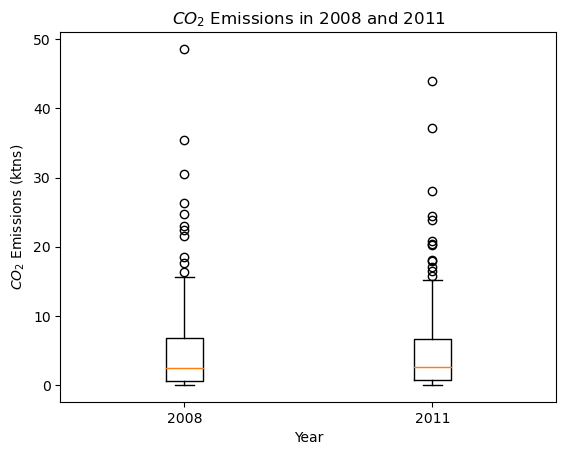

In [28]:
# create the boxplot using matplotlib plt, call DataFrame df2008 and df2011
plt.boxplot((df2008['Emission'],df2011['Emission']))

# use matplotlib functionality to customise the plot (not possible using Pandas on its own)
plt.xticks([1,2],['2008','2011'])
plt.xlabel('Year')
plt.ylabel('$CO_2$ Emissions (ktns)')
plt.title('$CO_2$ Emissions in 2008 and 2011')

We can also create seperate sub-plots using `matplotlib`, normally with the same y-axis range; otherwise the visualisation can be misleading!

In [166]:
plt.subplot?

Text(0.5, 0.01, 'Year')

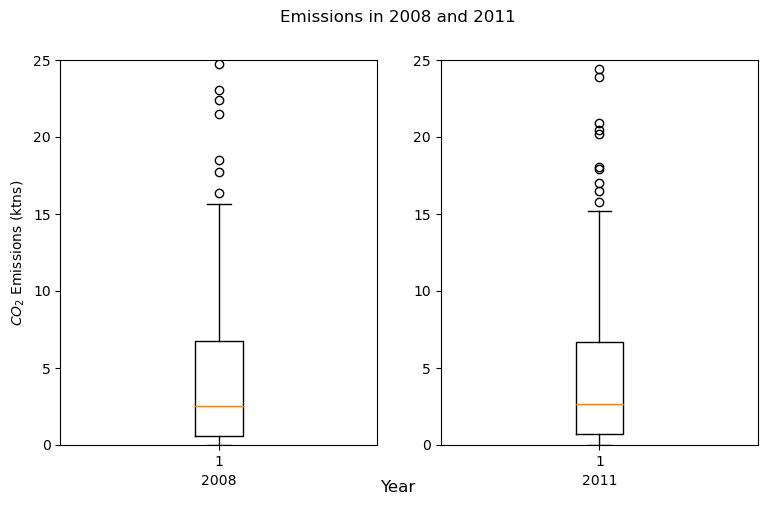

In [29]:
# tell matplotlib how many subplots to draw
plt.subplot(1,2,1)
# start of first subplot
plt.boxplot((df2008['Emission']))
# explicitly set the range of the y-axis, same for all subplots
plt.ylim([0,25])
# only add the y-axis label on the left-most subplot
plt.ylabel('$CO_2$ Emissions (ktns)')
plt.xlabel('2008')

# start of second subplot
plt.subplot(1,2,2)
plt.boxplot((df2011['Emission']))
plt.ylim([0,25])
plt.xlabel('2011')

# explicitly setting the size of the plot
fig = plt.gcf()
fig.set_size_inches(9, 5)
fig.suptitle('Emissions in 2008 and 2011')
fig.supxlabel('Year')

## 3. Data Pre-processing

Missing or erroneous data in real-world cause issues for some machine learning algorithms. We can either 1. delete (drop) the affected samples, or 2. populate missing data.

In [32]:
import pandas as pd
import numpy as np
df_pp = pd.read_excel('data-combinatorial-tutorial.xlsx', index_col=0)
df_pp

,2*N,N^2
N,,
10,20,100.0
20,40,400.0
30,60,900.0
40,80,1600.0
50,100,2500.0
60,120,3600.0
70,140,4900.0
80,160,6400.0
90,180,8100.0


Notice the missing data in the $N^2$ column, indicated as `NaN`. The `isnull()` method tells us which data points are missing, flagging them as `True`.

In [33]:
df_pp.isnull()

,2*N,N^2
N,,
10,False,False
20,False,False
30,False,False
40,False,False
50,False,False
60,False,False
70,False,False
80,False,False
90,False,False


### Dropping Missing Data

In [34]:
# Option 1: drop the rows/columns with any number of missing data
dropped_na_data = df_pp.dropna()
dropped_na_data

,2*N,N^2
N,,
10,20,100.0
20,40,400.0
30,60,900.0
40,80,1600.0
50,100,2500.0
60,120,3600.0
70,140,4900.0
80,160,6400.0
90,180,8100.0


In [35]:
# Option 2: remove the associated column(s)
c_dropped_na_data = df_pp.dropna(axis='columns')
c_dropped_na_data

,2*N
N,
10,20
20,40
30,60
40,80
50,100
60,120
70,140
80,160
90,180


This option allows us to retain all data samples, but we lose the entire $N^2$ column. 
For more information on `dropna` see this <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html">documentation</a>.

### Replacing Missing Data
Data are expensive. We'd rather replace the missing data with some "fake data", but with careful choice of values. Observe the following methods. Do these methods make sense in this context?

#### Zero Values

In [37]:
df_pp.replace?

In [38]:
# replace missing data simply with zero
zeroes_df = df_pp.replace(to_replace = np.nan, value = 0)
zeroes_df

,2*N,N^2
N,,
10,20,100.0
20,40,400.0
30,60,900.0
40,80,1600.0
50,100,2500.0
60,120,3600.0
70,140,4900.0
80,160,6400.0
90,180,8100.0


<Axes: xlabel='N'>

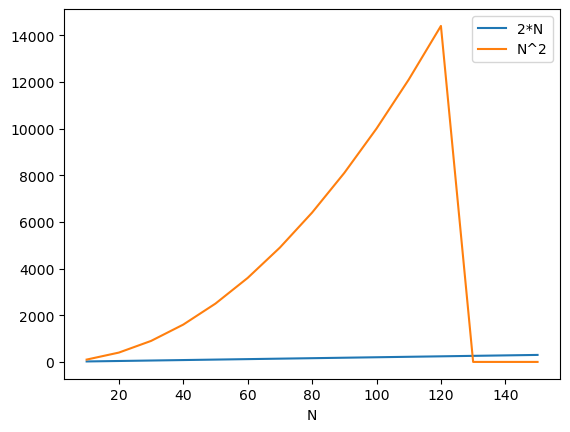

In [39]:
zeroes_df.plot()

#### Average Values

In [40]:
# populate missing data with average values for each data series
df_pp = pd.read_excel('data-combinatorial-tutorial.xlsx', index_col=0)
df_pp.isnull()

,2*N,N^2
N,,
10,False,False
20,False,False
30,False,False
40,False,False
50,False,False
60,False,False
70,False,False
80,False,False
90,False,False


We can use the `fillna()` method to replace all the missing data in the $N^2$ column with the median data point.

In [41]:
# calculate the median average of the $N^2$ column
med = df_pp['N^2'].median()

# fill all 'na' data points with `med`, and assign this back
df_pp['N^2'] = df_pp['N^2'].fillna(med)
# observe the last three rows now contain values equal to the median of the first 12 samples.
df_pp['N^2']

N
10       100.0
20       400.0
30       900.0
40      1600.0
50      2500.0
60      3600.0
70      4900.0
80      6400.0
90      8100.0
100    10000.0
110    12100.0
120    14400.0
130     4250.0
140     4250.0
150     4250.0
Name: N^2, dtype: float64

<Axes: xlabel='N'>

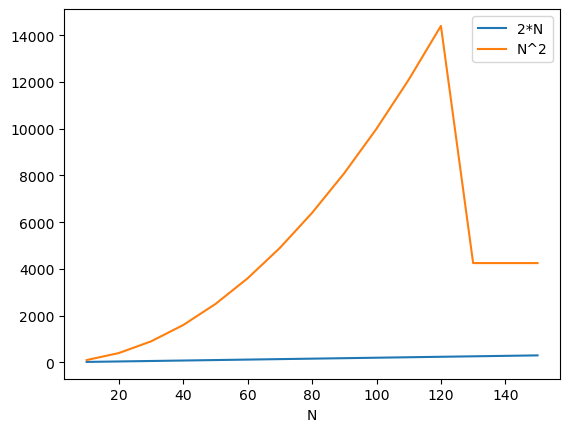

In [42]:
df_pp.plot()

#### Forward Filling Values

In [43]:
# forward filling fills the missing data with the last known value
df_pp = pd.read_excel('data-combinatorial-tutorial.xlsx', index_col=0)
df_pp

,2*N,N^2
N,,
10,20,100.0
20,40,400.0
30,60,900.0
40,80,1600.0
50,100,2500.0
60,120,3600.0
70,140,4900.0
80,160,6400.0
90,180,8100.0


In [44]:
df_pp = df_pp.fillna(method='ffill') # forward fill
df_pp

,2*N,N^2
N,,
10,20,100.0
20,40,400.0
30,60,900.0
40,80,1600.0
50,100,2500.0
60,120,3600.0
70,140,4900.0
80,160,6400.0
90,180,8100.0


<Axes: xlabel='N'>

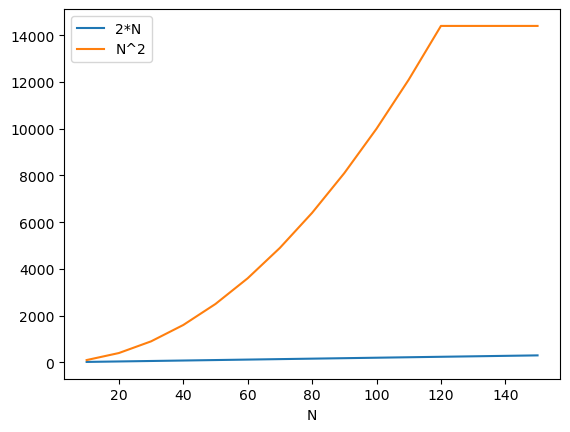

In [45]:
df_pp.plot()

Note that there are multiple methods for replacing missing values using `fillna()` as seen <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html">here</a>.

#### Randomised Values <span id="replace-ran"></span>
Try running this example several times. 
Note that the missing data has been replaced with a randomly selected value from the existing data.

In [47]:
import random
df_pp = pd.read_excel('data-combinatorial-tutorial.xlsx', index_col=0)
df_pp['N^2'] = df_pp['N^2'].fillna(random.choice(df_pp['N^2'].values.tolist()))
df_pp

,2*N,N^2
N,,
10,20,100.0
20,40,400.0
30,60,900.0
40,80,1600.0
50,100,2500.0
60,120,3600.0
70,140,4900.0
80,160,6400.0
90,180,8100.0


<Axes: xlabel='N'>

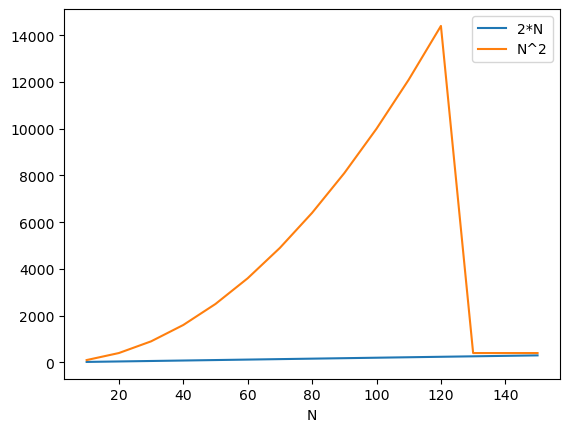

In [48]:
df_pp.plot()

Note: Data is valuable. An improper method filling in the missing data can change the properties of the data, e.g. the mean and median of the distribution. The effects of using different methods to real-world data may not be so obvious!

## Mini-Challenge 1: Graphing Combinatorial Explosion <span id="part3"></span>

<div class="alert alert-success">
    <h3>Mini-Challenge (Submit to Moodle!)</h3>
</div>

A challenge dataset `data-combinatorial-challenge.xlsx` is provided. With the knowledge you have gained from this exercise, create a plot which you deem to be appropriate for visualising the data in the dataset.

You should import the data using pandas and pre-process the data to remove or correct (as appropriate) any missing data. By default the y-axis on a plot has a linear scaling. This might not be appropriate for this case; explore setting a logaritmic scale!

Once you are happy with your plot, submit an image of the plot in Moodle (save the plot by right-clicking on the plot and save it). After uploading the image and pressing submit, you should see the following screen; add your comment and press "Save comment". Your "comment" should be on the "pros and cons" when processing the missing data and the chosen plot as follows: 

```
Plot type: [ Pie chart ]
Missing data completion method: [ Zero fill ]
Pros: [ Retain all data series ]
Cons: [ Data is unrealistic for large values of 'N' ]
```

![na](data/submission.png)

***The class will receive anonymised feedback in a lecture based on everyone's responses.***

In [227]:
ddf = pd.read_excel('data-combinatorial-challenge.xlsx')
ddf

,N,2*N,N^2,N^8,2^N,N!
0,10,20,100,1.000000e+08,1.024000e+03,3.628800e+06
1,20,40,400,2.560000e+10,1.048576e+06,2.432902e+18
2,30,60,900,6.561000e+11,1.073742e+09,NaN
3,40,80,1600,6.553600e+12,1.099512e+12,8.159153e+47
4,50,100,2500,3.906250e+13,1.125900e+15,3.041409e+64
5,60,120,3600,1.679616e+14,1.152922e+18,NaN
6,70,140,4900,5.764801e+14,1.180592e+21,1.197857e+100
7,80,160,6400,1.677722e+15,1.208926e+24,7.156946e+118
8,90,180,8100,4.304672e+15,1.237940e+27,NaN
9,100,200,10000,1.000000e+16,1.267651e+30,9.332622e+157


In [228]:
ddf.dtypes

N        int64
2*N      int64
N^2      int64
N^8    float64
2^N    float64
N!     float64
dtype: object

In [229]:
# Enter your data pre-processing and plotting code here!
import math
import mpmath

#NULL values are filled respectivelly with the corresponding value
ddf['N^8'].fillna(ddf['N']**8,inplace=True)
ddf['2^N'] = ddf['2^N'].astype(float)
ddf['2^N'].fillna(0,inplace=True)
ddf['N!'].fillna(method="ffill",inplace=True)

ddf


,N,2*N,N^2,N^8,2^N,N!
0,10,20,100,1.000000e+08,1.024000e+03,3.628800e+06
1,20,40,400,2.560000e+10,1.048576e+06,2.432902e+18
2,30,60,900,6.561000e+11,1.073742e+09,2.432902e+18
3,40,80,1600,6.553600e+12,1.099512e+12,8.159153e+47
4,50,100,2500,3.906250e+13,1.125900e+15,3.041409e+64
5,60,120,3600,1.679616e+14,1.152922e+18,3.041409e+64
6,70,140,4900,5.764801e+14,1.180592e+21,1.197857e+100
7,80,160,6400,1.677722e+15,1.208926e+24,7.156946e+118
8,90,180,8100,4.304672e+15,1.237940e+27,7.156946e+118
9,100,200,10000,1.000000e+16,1.267651e+30,9.332622e+157


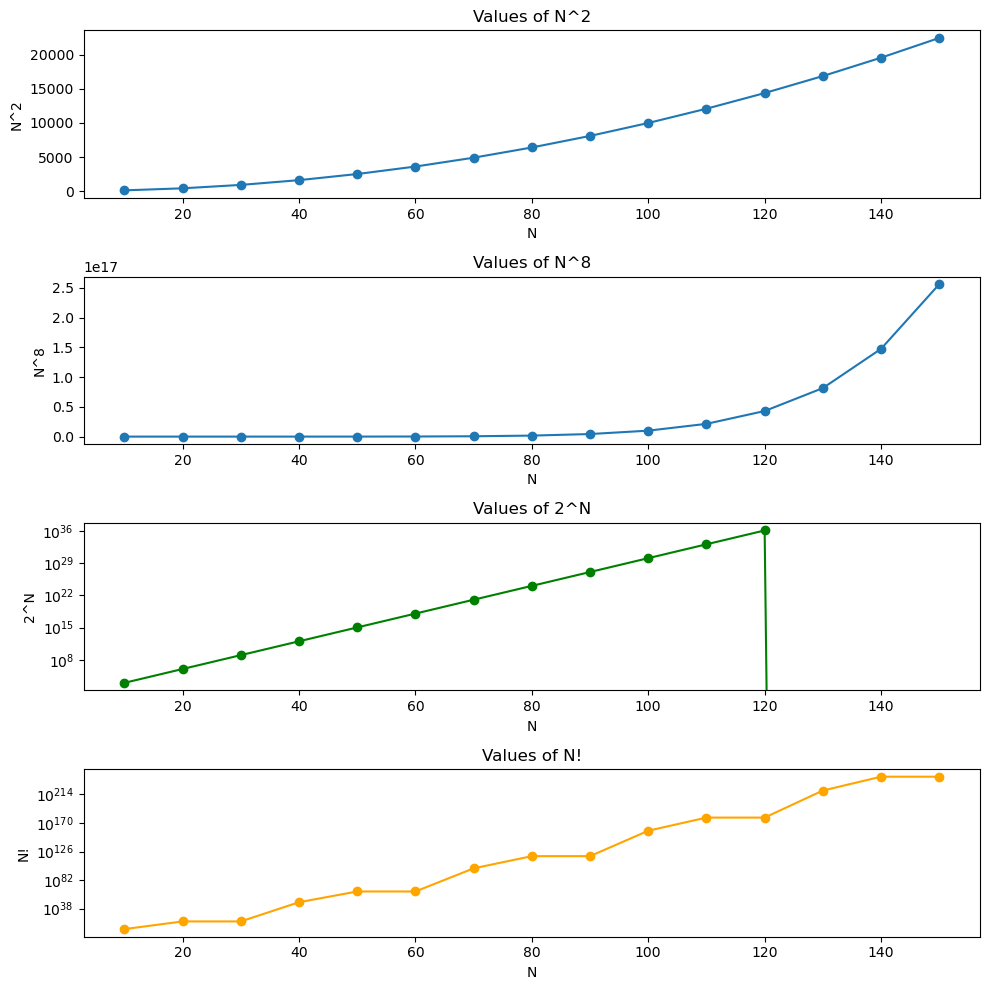

In [231]:

fig, axes = plt.subplots(4, 1, figsize=(10, 10))


axes[0].plot(ddf['N'], ddf['N^2'], label='N^2', marker='o')
axes[0].set_xlabel('N')
axes[0].set_ylabel('N^2')
axes[0].set_title('Values of N^2')

axes[3].semilogy(ddf['N'], ddf['N!'], label='N!', marker='o', color='orange')
axes[3].set_xlabel('N')
axes[3].set_ylabel('N!')
axes[3].set_title('Values of N!')

axes[2].semilogy(ddf['N'],ddf['2^N'],label='2^N',marker='o',color='green')
axes[2].set_xlabel('N')
axes[2].set_ylabel('2^N')
axes[2].set_title('Values of 2^N')

axes[1].plot(ddf['N'], ddf['N^8'], label='N^8', marker='o')
axes[1].set_xlabel('N')
axes[1].set_ylabel('N^8')
axes[1].set_title('Values of N^8')
                

plt.tight_layout()

plt.show()

<div class="alert alert-success">
    <h2>🍰 End</h2> 
</div>